## Load libraries to use

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load our dataset to a Dataframe

In [16]:
df_exams = pd.read_csv('./datasets/exams.csv')
df_exams.info()
df_exams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  100 non-null    int64 
 1   sex        100 non-null    object
 2   age        100 non-null    int64 
 3   weight     100 non-null    int64 
 4   height     100 non-null    int64 
 5   result     100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


,patientId,sex,age,weight,height,result
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


## Preprocessing 
Preprocess the data by removing the missing values and the outliers
  - We saw that in this dataset we don't have any missing values, so we don't need to remove any rows or columns.
  - This dataset has no outliers, so we don't need to remove any rows or columns.
  - It's important to notice that we don't need the column "patientId" for our analysis, so we will remove it.
  - Our "sex" column has the values "M" and "F", we will convert them using [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

In [17]:
df_exams.drop(columns=['patientId'], axis=1, inplace=True)
df_exams = pd.get_dummies(df_exams, columns=['sex'], dtype='int64')
df_exams.head()

,age,weight,height,result,sex_F,sex_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


## Data visualization & First Insights

a) Heatmap
  - We will use a heatmap to visualize the correlation between the "result" and the other columns.

<Axes: >

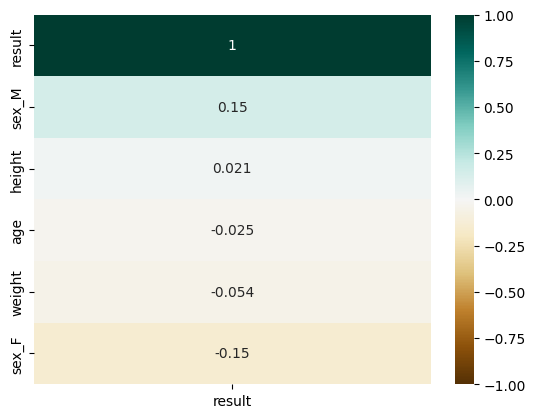

In [18]:
sns.heatmap(df_exams.corr()[['result']].sort_values(by='result', ascending=False), annot=True, cmap='BrBG', vmin=-1, vmax=1)

b) Scatter plot
  - We will use a scatter plot to visualize the correlation between the columns.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='result', ylabel='age'>,
        <Axes: xlabel='sex_F', ylabel='age'>,
        <Axes: xlabel='sex_M', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='result', ylabel='weight'>,
        <Axes: xlabel='sex_F', ylabel='weight'>,
        <Axes: xlabel='sex_M', ylabel='weight'>],
       [<Axes: xlabel='age', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='result', ylabel='height'>,
        <Axes: xlabel='sex_F', ylabel='height'>,
        <Axes: xlabel='sex_M', ylabel='height'>],
       [<Axes: xlabel='age', ylabel='result'>,
        <Axes: xlabel='weight', ylabel='result'>,
        <Axes: xlabel='height', y

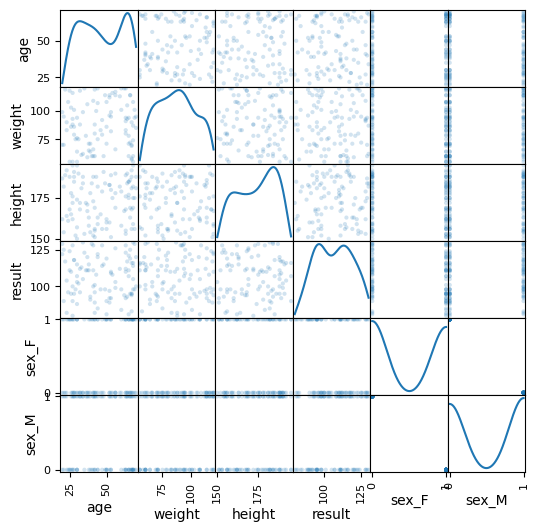

In [19]:
pd.plotting.scatter_matrix(df_exams, figsize=(6, 6), alpha=0.2, diagonal='kde')

c) Histogram
  - We will use a histogram to visualize the distribution of the columns.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'sex_F'}>,
        <Axes: title={'center': 'sex_M'}>]], dtype=object)

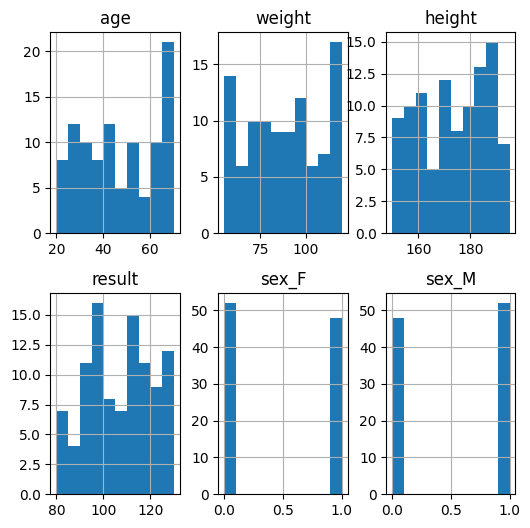

In [20]:
df_exams.hist(layout=(2, 3), figsize=(6, 6))

#### First Insights

As we can see, our features don't have a strong correlation with the "result" column. Maybe we can try to create a feature that combines weight and height to see if we can get a better correlation. That index is called BMI (Body Mass Index).